In [1]:
from Test_de_visualizacion import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

#   EN ESTE PROGRAMA VISUALIZAREMOS DE FORMA SIMPLE LA TOTALIDAD DE LOS DATOS

# Partiremos extrayendo los datos totales correspondiente a 61 meses
# partiendo en enero de 2018 hasta enero de 2023.

data_keys = ['radialDistance', 'heliographicLatitude', 'heliographicLongitude', 
             'BR', 'BT', 'BN', 'B', 'VR', 'VT', 'VN', 'ProtonSpeed', 'flow_theta', 'flow_lon', 
             'protonDensity', 'protonTemp','Epoch']

data = ObtenerDatas(data_keys)
R = data[0]
HLat = data[1]
Hlon = data[2]
BR = data[3]
BT = data[4]
BN = data[5]
B  = data[6]
VR= data[7]
VT= data[8]
VN= data[9]
Pspeed = data[10]
flow_theta = data[11]
flow_lon= data[12]
Pdens= data[13]
Ptemp = data[14]
epoch = data[15]


print(B.size,BR.size)

Meses cargados:  1
Meses cargados:  2
Meses cargados:  3
Meses cargados:  4
Meses cargados:  5
Meses cargados:  6
Meses cargados:  7
Meses cargados:  8
Meses cargados:  9
Meses cargados:  10
Meses cargados:  11
Meses cargados:  12
Meses cargados:  13
Meses cargados:  14
Meses cargados:  15
Meses cargados:  16
Meses cargados:  17
Meses cargados:  18
Meses cargados:  19
Meses cargados:  20
Meses cargados:  21
Meses cargados:  22
Meses cargados:  23
Meses cargados:  24
Meses cargados:  25
Meses cargados:  26
Meses cargados:  27
Meses cargados:  28
Meses cargados:  29
Meses cargados:  30
Meses cargados:  31
Meses cargados:  32
Meses cargados:  33
Meses cargados:  34
Meses cargados:  35
Meses cargados:  36
Meses cargados:  37
Meses cargados:  38
Meses cargados:  39
Meses cargados:  40
Meses cargados:  41
Meses cargados:  42
Meses cargados:  43
Meses cargados:  44
Meses cargados:  45
Meses cargados:  46
Meses cargados:  47
Meses cargados:  48
Meses cargados:  49
Meses cargados:  50
Meses car

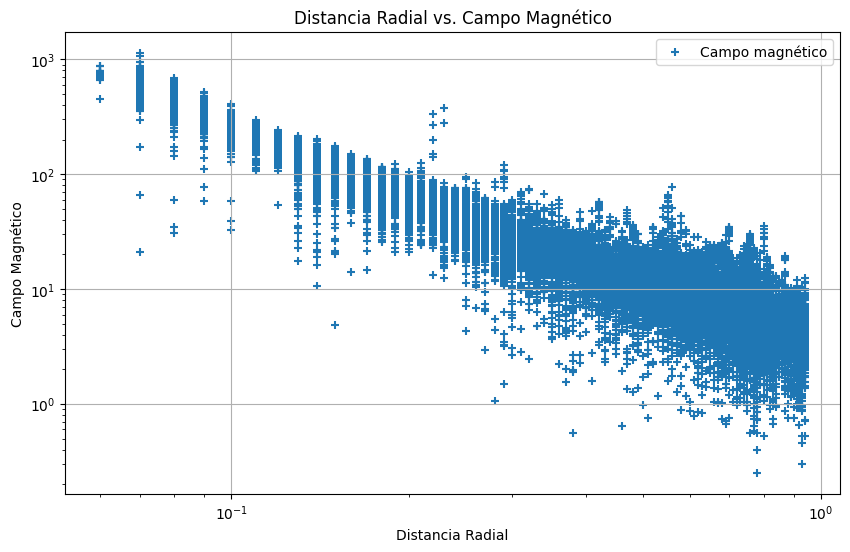

In [2]:
# Gráfico en escala logarítmica de magnitud campo magnético en funcion de distancia radial

plt.figure(figsize=(10, 6))
plt.scatter(R, B, marker='+', label='Campo magnético')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Distancia Radial')
plt.ylabel('Campo Magnético')
plt.title('Distancia Radial vs. Campo Magnético')
plt.legend()
plt.grid(True)
plt.show()
#plt.close("all")

-658.0499877929688 190.91000366210938


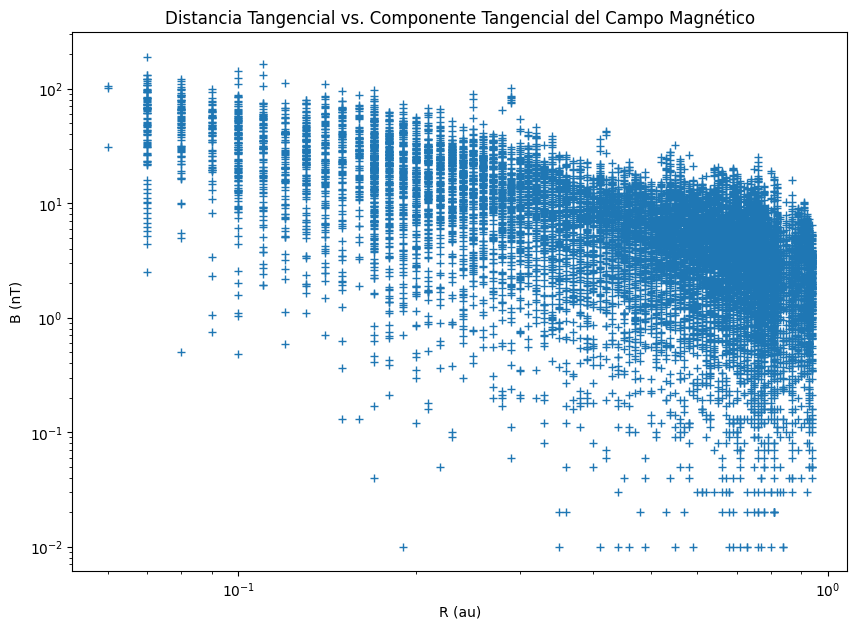

In [3]:
plt.close("all")
valid_indices2 = np.where(~np.isnan(R) & ~np.isnan(BT))
valid_R = R[valid_indices2]
valid_BT = BT[valid_indices2]

R_min, R_max = np.min(valid_R), np.max(valid_R)
BT_min, BT_max = np.min(valid_BT), np.max(valid_BT)

print(BT_min, BT_max)
#valid_BT_pos = valid_BT - BT_min

plt.figure(figsize=(10,7))

plt.plot(valid_R,valid_BT,'+')
plt.xlabel('R (au)')
plt.ylabel('B (nT)')
plt.title('Distancia Tangencial vs. Componente Tangencial del Campo Magnético')
plt.xscale('log')
plt.yscale('log')
#plt.ylim((-200,200))
#plt.colorbar()


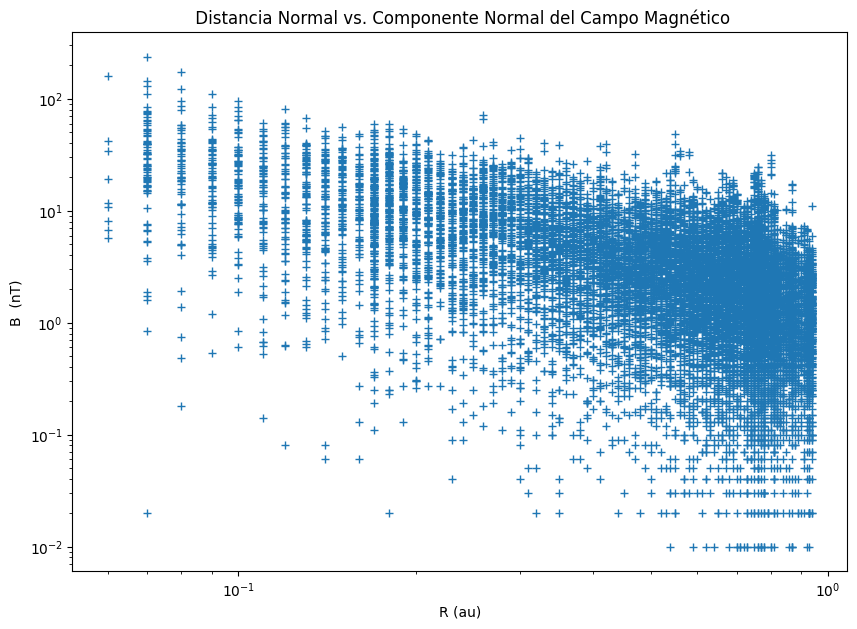

In [4]:
plt.close("all")
valid_indices3 = np.where(~np.isnan(R) & ~np.isnan(BN))
valid_R = R[valid_indices3]
valid_BN = BN[valid_indices3]

R_min, R_max = np.min(valid_R), np.max(valid_R)
BN_min, BN_max = np.min(valid_BN), np.max(valid_BN)

plt.figure(figsize=(10,7))
plt.plot(valid_R,valid_BN,'+')

plt.xlabel('R (au)')
plt.ylabel('B  (nT)')
plt.title(' Distancia Normal vs. Componente Normal del Campo Magnético')
plt.xscale('log')
plt.yscale('log')

#plt.ylim((-200,200))
#plt.colorbar()


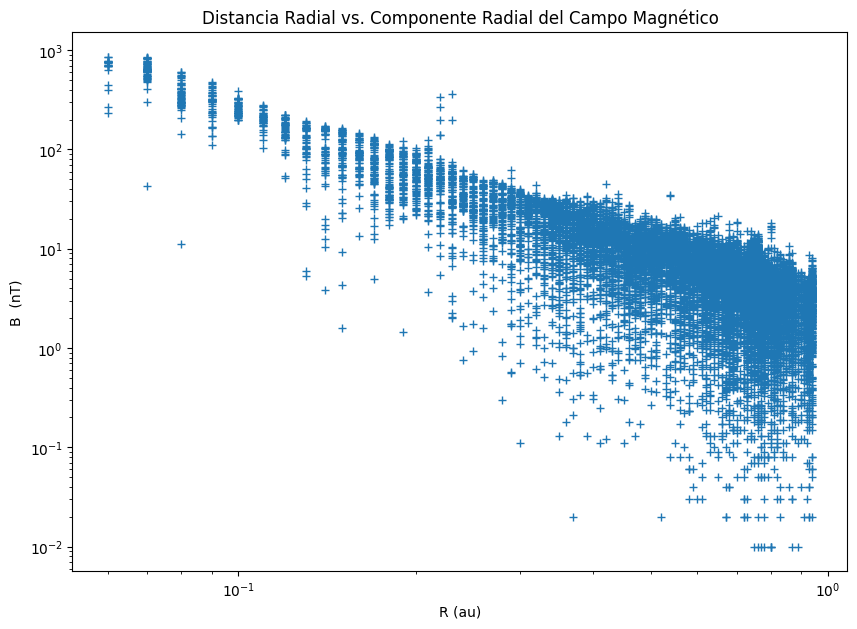

In [5]:
plt.close("all")
valid_indices3 = np.where(~np.isnan(R) & ~np.isnan(BR))
valid_R = R[valid_indices3]
valid_BR = BR[valid_indices3]

R_min, R_max = np.min(valid_R), np.max(valid_R)
BR_min, BR_max = np.min(valid_BR), np.max(valid_BR)

plt.figure(figsize=(10,7))
plt.plot(valid_R,valid_BR,'+')

plt.xlabel('R (au)')
plt.ylabel('B  (nT)')
plt.title('Distancia Radial vs. Componente Radial del Campo Magnético')
#plt.ylim((-200,200))
#plt.colorbar()
plt.xscale('log')
plt.yscale('log')


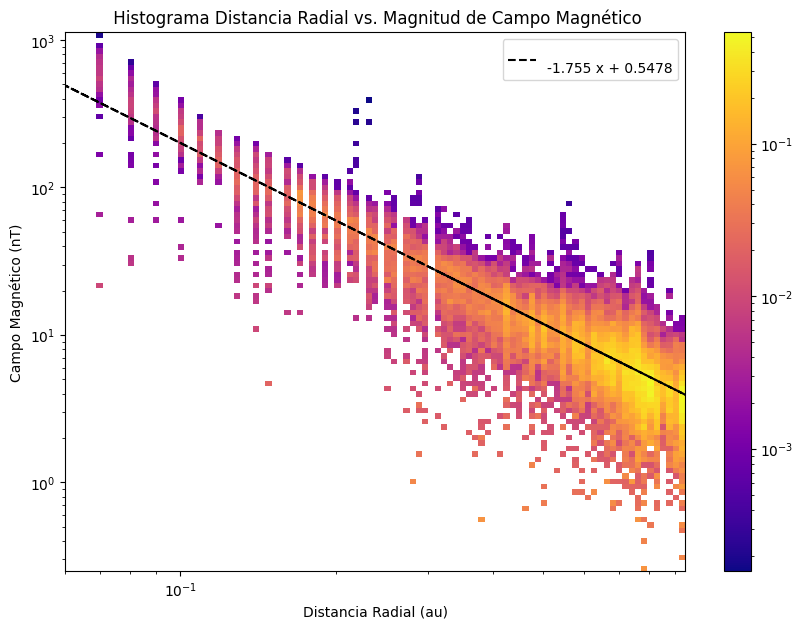

In [6]:
valid_indices = np.where(~np.isnan(R) & ~np.isnan(B))
#Luego selecciono solo estos valores para el conteo de datos
valid_R = R[valid_indices]
valid_B = B[valid_indices]

R_min, R_max = np.min(valid_R), np.max(valid_R)
B_min, B_max = np.min(valid_B), np.max(valid_B)

logx = np.log10(valid_R)
logy = np.log10(valid_B)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)

def yfit(x):
    return np.power(10, poly(np.log10(x)))

error_B = 0.5*(yfit(valid_R) - valid_B)/valid_B

# separo el espacio de datos en 100 "cajitas" de ancho y de alto
# utilizando escala logaritmica
R_bins = np.logspace(np.log10(R_min), np.log10(R_max), 100)
B_bins = np.logspace(np.log10(B_min), np.log10(B_max), 100)

plt.figure(figsize=(10,7))
plt.hist2d(valid_R, valid_B,  bins=(R_bins,B_bins), norm=colors.LogNorm(), density=True,cmap='plasma')
plt.plot(valid_R, yfit(valid_R), '--', c='black', label=str(poly))

#plt.errorbar(valid_R,yfit(valid_R), yerr=error_B, fmt='none', c='black', elinewidth=1, label='Barras de Error')

plt.xlabel('Distancia Radial (au)')
plt.ylabel('Campo Magnético (nT)')
plt.title(' Histograma Distancia Radial vs. Magnitud de Campo Magnético')
plt.colorbar()
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.show()

 
0.03728 x - 0.5562
 
-0.1003 x - 0.4596
 
-0.05921 x - 0.3624


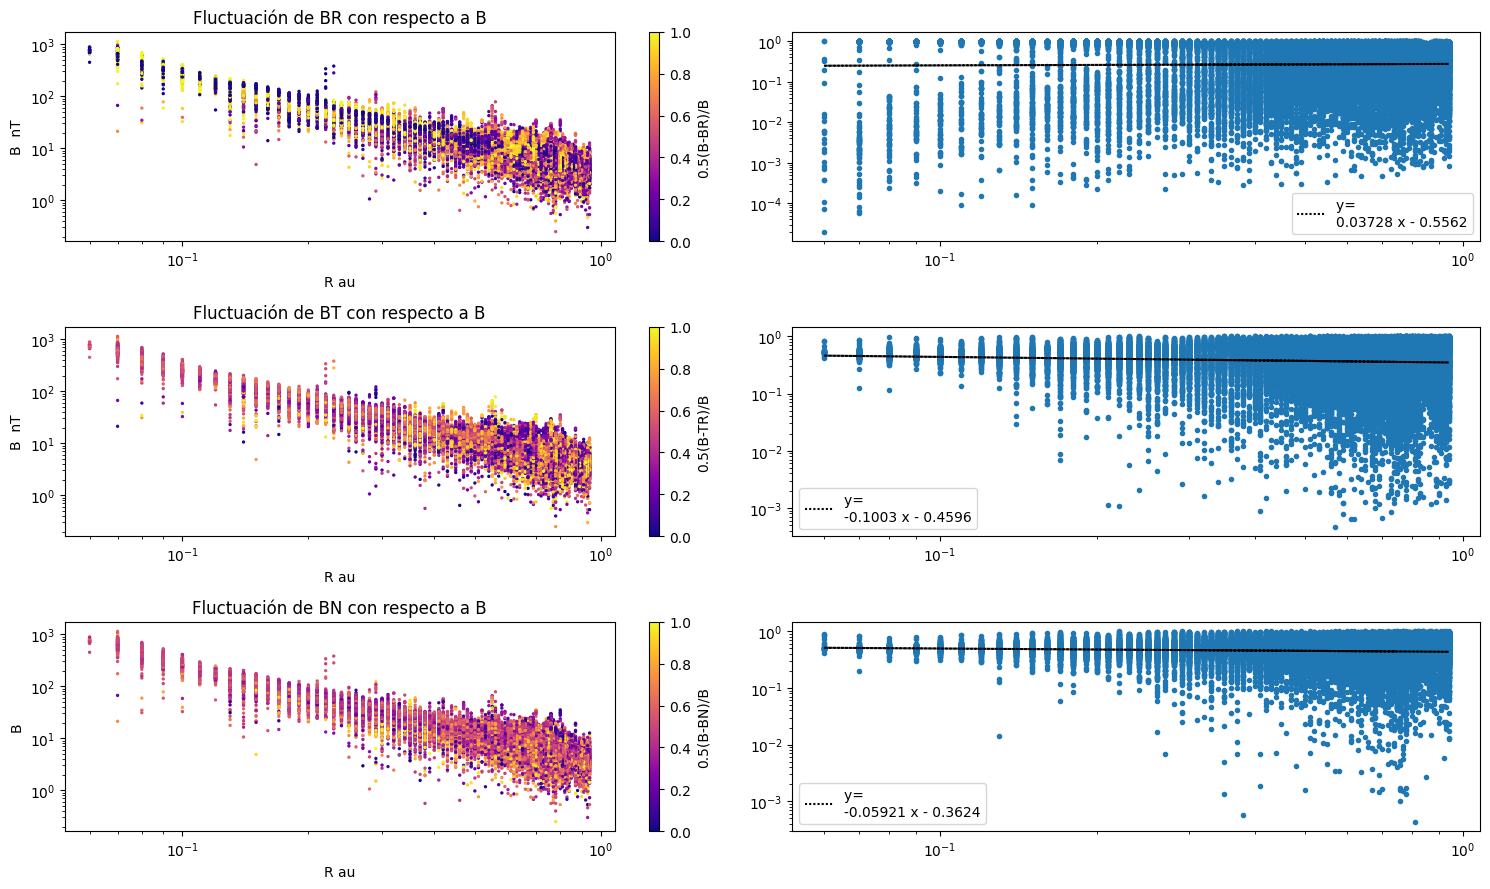

In [7]:

# Calcula las fluctuaciones de las componentes con respecto a la magnitud total.
fluct_BR = 0.5*(B-BR) / B
fluct_BT = 0.5*(B-BT) / B
fluct_BN = 0.5*(B-BN) / B
# Crea gráficos de las fluctuaciones en disposición vertical.
fig, axes = plt.subplots(3, 2, figsize=(15, 9))  # 3 filas, 2 columna.

####################################################################################
####################################################################################
# Gráfico de las fluctuaciones de BR con respecto a B.
sc1 = axes[0][0].scatter(R, B, c=fluct_BR ,cmap='plasma',s=2)
axes[0][0].set_xlabel('R au')
axes[0][0].set_ylabel('B  nT')
axes[0][0].set_title('Fluctuación de BR con respecto a B')
axes[0][0].set_xscale('log')
axes[0][0].set_yscale('log')
plt.colorbar(sc1, ax=axes[0][0], label='0.5(B-BR)/B')

## Fiteo de la recta
valid_indices = np.where(~np.isnan(R) & ~np.isnan(fluct_BR))
valid_R = R[valid_indices]
valid_fluct_BR = fluct_BR[valid_indices]
valid_indices = np.where(valid_fluct_BR != 0)
valid_R = valid_R[valid_indices]
valid_fluct_BR = valid_fluct_BR[valid_indices]
logx = np.log10(valid_R)
logy = np.log10(valid_fluct_BR)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
print(poly)
def yfit(x):
    return np.power(10, poly(np.log10(x)))

axes[0][1].plot(R,fluct_BR, '.')
axes[0][1].plot(valid_R,yfit(valid_R),linestyle=(0, (1, 1)), c='black', label='y= '+str(poly))
axes[0][1].set_xscale('log')
axes[0][1].set_yscale('log')
axes[0][1].legend()


####################################################################################
####################################################################################
# Gráfico de las fluctuaciones de BT con respecto a B.
sc2 = axes[1][0].scatter(R,B, c= fluct_BT, cmap='plasma',s=2)
axes[1][0].set_xlabel('R au')
axes[1][0].set_ylabel('B  nT')
axes[1][0].set_title('Fluctuación de BT con respecto a B')
axes[1][0].set_xscale('log')
axes[1][0].set_yscale('log')
plt.colorbar(sc2, ax=axes[1][0], label='0.5(B-TR)/B')

## Fiteo de la recta
valid_indices = np.where(~np.isnan(R) & ~np.isnan(fluct_BT))
valid_R = R[valid_indices]
valid_fluct_BT = fluct_BT[valid_indices]
valid_indices = np.where(valid_fluct_BT != 0)
valid_R = valid_R[valid_indices]
valid_fluct_BT = valid_fluct_BT[valid_indices]
logx = np.log10(valid_R)
logy = np.log10(valid_fluct_BT)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
print(poly)
def yfit(x):
    return np.power(10, poly(np.log10(x)))

axes[1][1].plot(R,fluct_BT, '.')
axes[1][1].plot(valid_R,yfit(valid_R),linestyle=(0, (1, 1)), c='black', label='y= '+str(poly))
axes[1][1].set_xscale('log')
axes[1][1].set_yscale('log')
axes[1][1].legend()

####################################################################################
####################################################################################
# Gráfico de las fluctuaciones de BN con respecto a B.
sc3 = axes[2][0].scatter(R, B, c= fluct_BN,cmap='plasma',s=2)
axes[2][0].set_xlabel('R au')
axes[2][0].set_ylabel('B')
axes[2][0].set_title('Fluctuación de BN con respecto a B')
axes[2][0].set_xscale('log')
axes[2][0].set_yscale('log')
plt.colorbar(sc3, ax=axes[2][0], label='0.5(B-BN)/B')

## Fiteo de la recta
valid_indices = np.where(~np.isnan(R) & ~np.isnan(fluct_BN))
valid_R = R[valid_indices]
valid_fluct_BN = fluct_BN[valid_indices]
valid_indices = np.where(valid_fluct_BN != 0)
valid_R = valid_R[valid_indices]
valid_fluct_BN = valid_fluct_BN[valid_indices]
logx = np.log10(valid_R)
logy = np.log10(valid_fluct_BN)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
print(poly)
def yfit(x):
    return np.power(10, poly(np.log10(x)))


axes[2][1].plot(R,fluct_BN, '.')
axes[2][1].plot(valid_R,yfit(valid_R),linestyle=(0, (1, 1)), c='black', label='y= '+str(poly))
axes[2][1].set_xscale('log')
axes[2][1].set_yscale('log')
axes[2][1].legend()

plt.tight_layout()
plt.show()



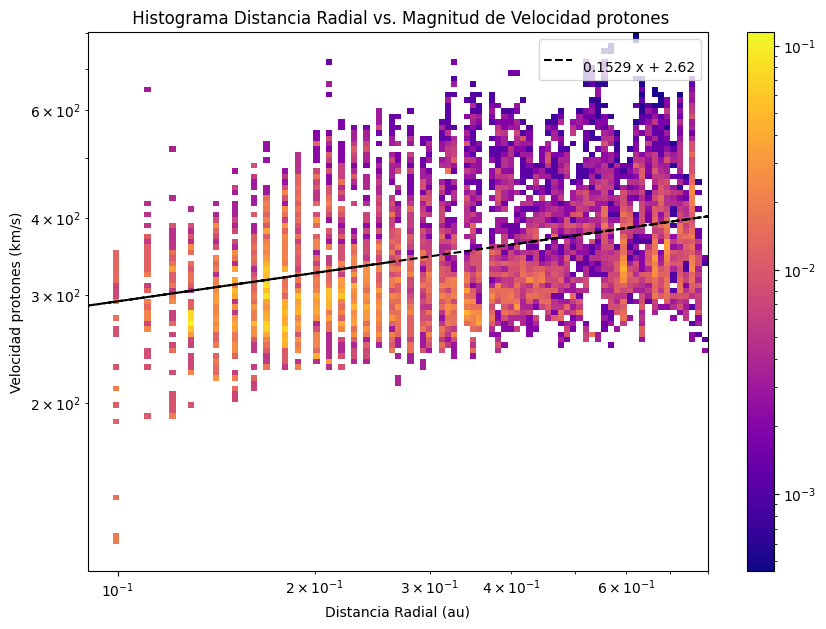

In [8]:
# VELOCIDAD DE PROTONES
####################################################################################
####################################################################################
####################################################################################
####################################################################################
valid_indices = np.where(~np.isnan(R) & ~np.isnan(Pspeed))
#Luego selecciono solo estos valores para el conteo de datos
valid_R = R[valid_indices]
valid_B = Pspeed[valid_indices]

R_min, R_max = np.min(valid_R), np.max(valid_R)
B_min, B_max = np.min(valid_B), np.max(valid_B)

logx = np.log10(valid_R)
logy = np.log10(valid_B)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)

def yfit(x):
    return np.power(10, poly(np.log10(x)))

error_B = 0.5*(yfit(valid_R) - valid_B)/valid_B

# separo el espacio de datos en 100 "cajitas" de ancho y de alto
# utilizando escala logaritmica
R_bins = np.logspace(np.log10(R_min), np.log10(R_max), 100)
B_bins = np.logspace(np.log10(B_min), np.log10(B_max), 100)

plt.figure(figsize=(10,7))
plt.hist2d(valid_R, valid_B,  bins=(R_bins,B_bins), norm=colors.LogNorm(), density=True,cmap='plasma')
plt.plot(valid_R, yfit(valid_R), '--', c='black', label=str(poly))

#plt.errorbar(valid_R,yfit(valid_R), yerr=error_B, fmt='none', c='black', elinewidth=1, label='Barras de Error')

plt.xlabel('Distancia Radial (au)')
plt.ylabel('Velocidad protones (km/s)')
plt.title(' Histograma Distancia Radial vs. Magnitud de Velocidad protones')
plt.colorbar()
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.show()

 
-0.7453 x - 3.16
 
0.06971 x - 0.2812
 
-0.004715 x - 0.303


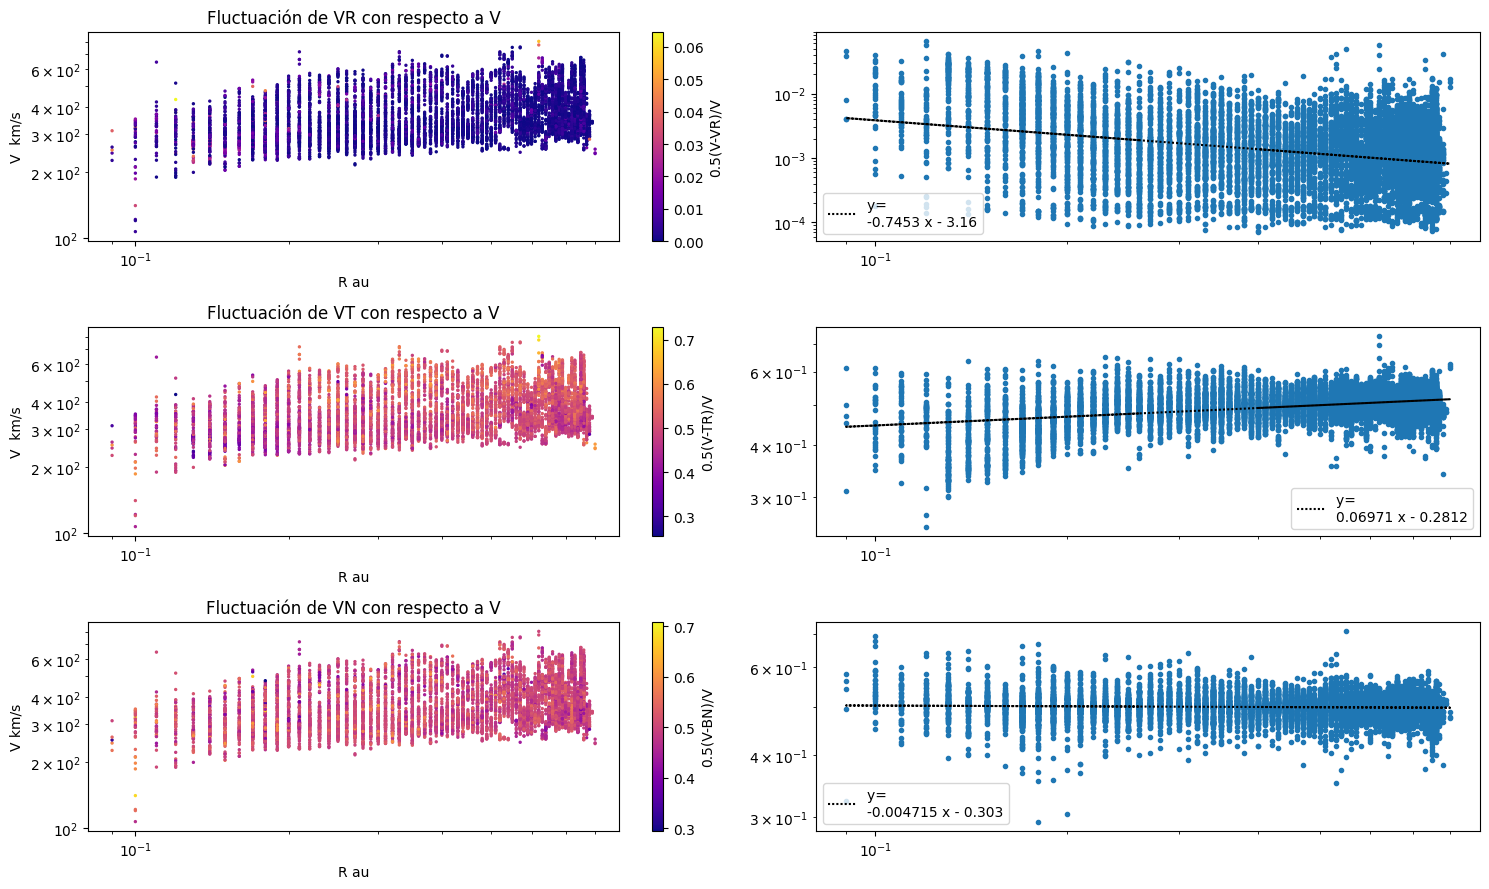

In [9]:

# VELOCIDAD DE PROTONES
####################################################################################
####################################################################################
####################################################################################
####################################################################################

# Calcula las fluctuaciones de las componentes con respecto a la magnitud total.
fluct_BR = 0.5*(Pspeed-VR) / Pspeed
fluct_BT = 0.5*(Pspeed-VT) / Pspeed
fluct_BN = 0.5*(Pspeed-VN) / Pspeed
# Crea gráficos de las fluctuaciones en disposición vertical.
fig, axes = plt.subplots(3, 2, figsize=(15, 9))  # 3 filas, 2 columna.

####################################################################################
####################################################################################
# Gráfico de las fluctuaciones de BR con respecto a B.
sc1 = axes[0][0].scatter(R, Pspeed, c=fluct_BR ,cmap='plasma',s=2)
axes[0][0].set_xlabel('R au')
axes[0][0].set_ylabel('V  km/s')
axes[0][0].set_title('Fluctuación de VR con respecto a V')
axes[0][0].set_xscale('log')
axes[0][0].set_yscale('log')
plt.colorbar(sc1, ax=axes[0][0], label='0.5(V-VR)/V')

## Fiteo de la recta
valid_indices = np.where(~np.isnan(R) & ~np.isnan(fluct_BR))
valid_R = R[valid_indices]
valid_fluct_BR = fluct_BR[valid_indices]
valid_indices = np.where(valid_fluct_BR != 0)
valid_R = valid_R[valid_indices]
valid_fluct_BR = valid_fluct_BR[valid_indices]
logx = np.log10(valid_R)
logy = np.log10(valid_fluct_BR)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
print(poly)
def yfit(x):
    return np.power(10, poly(np.log10(x)))

axes[0][1].plot(R,fluct_BR, '.')
axes[0][1].plot(valid_R,yfit(valid_R),linestyle=(0, (1, 1)), c='black', label='y= '+str(poly))
axes[0][1].set_xscale('log')
axes[0][1].set_yscale('log')
axes[0][1].legend()


####################################################################################
####################################################################################
# Gráfico de las fluctuaciones de BT con respecto a B.
sc2 = axes[1][0].scatter(R,Pspeed, c= fluct_BT, cmap='plasma',s=2)
axes[1][0].set_xlabel('R au')
axes[1][0].set_ylabel('V  km/s')
axes[1][0].set_title('Fluctuación de VT con respecto a V')
axes[1][0].set_xscale('log')
axes[1][0].set_yscale('log')
plt.colorbar(sc2, ax=axes[1][0], label='0.5(V-TR)/V')

## Fiteo de la recta
valid_indices = np.where(~np.isnan(R) & ~np.isnan(fluct_BT))
valid_R = R[valid_indices]
valid_fluct_BT = fluct_BT[valid_indices]
valid_indices = np.where(valid_fluct_BT != 0)
valid_R = valid_R[valid_indices]
valid_fluct_BT = valid_fluct_BT[valid_indices]
logx = np.log10(valid_R)
logy = np.log10(valid_fluct_BT)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
print(poly)
def yfit(x):
    return np.power(10, poly(np.log10(x)))

axes[1][1].plot(R,fluct_BT, '.')
axes[1][1].plot(valid_R,yfit(valid_R),linestyle=(0, (1, 1)), c='black', label='y= '+str(poly))
axes[1][1].set_xscale('log')
axes[1][1].set_yscale('log')
axes[1][1].legend()

####################################################################################
####################################################################################
# Gráfico de las fluctuaciones de BN con respecto a B.
sc3 = axes[2][0].scatter(R, Pspeed, c= fluct_BN,cmap='plasma',s=2)
axes[2][0].set_xlabel('R au')
axes[2][0].set_ylabel('V km/s')
axes[2][0].set_title('Fluctuación de VN con respecto a V')
axes[2][0].set_xscale('log')
axes[2][0].set_yscale('log')
plt.colorbar(sc3, ax=axes[2][0], label='0.5(V-BN)/V')

## Fiteo de la recta
valid_indices = np.where(~np.isnan(R) & ~np.isnan(fluct_BN))
valid_R = R[valid_indices]
valid_fluct_BN = fluct_BN[valid_indices]
valid_indices = np.where(valid_fluct_BN != 0)
valid_R = valid_R[valid_indices]
valid_fluct_BN = valid_fluct_BN[valid_indices]
logx = np.log10(valid_R)
logy = np.log10(valid_fluct_BN)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
print(poly)
def yfit(x):
    return np.power(10, poly(np.log10(x)))


axes[2][1].plot(R,fluct_BN, '.')
axes[2][1].plot(valid_R,yfit(valid_R),linestyle=(0, (1, 1)), c='black', label='y= '+str(poly))
axes[2][1].set_xscale('log')
axes[2][1].set_yscale('log')
axes[2][1].legend()

plt.tight_layout()
plt.show()


 
0.7405 x - 4.955


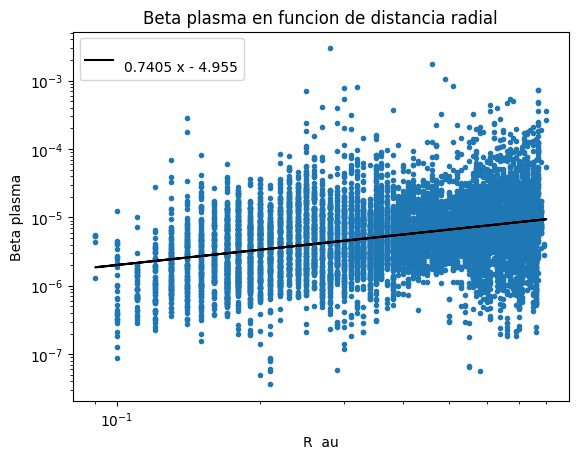

In [10]:
kB = 8.617333262e-5  # eV K**-1
mu_0 = 1.25663706212e-6 ## H/m
presion = Pdens*kB*Ptemp
presion_mag = 0.5*(B**2)/mu_0

beta = presion/presion_mag

plt.plot(R, beta, '.')
plt.xscale('log')
plt.yscale('log') 
plt.title('Beta plasma en funcion de distancia radial')

indices = np.where(~np.isnan(R) & ~np.isnan(beta))
valid_R = R[indices]
valid_beta = beta[indices]

logx = np.log10(valid_R)
logy = np.log10(valid_beta)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
print(poly)
def yfit(x):
    return np.power(10, poly(np.log10(x)))


plt.plot(valid_R,yfit(valid_R), '-', c='black', label= str(poly))
plt.xlabel('R  au')
plt.ylabel('Beta plasma')
plt.legend()

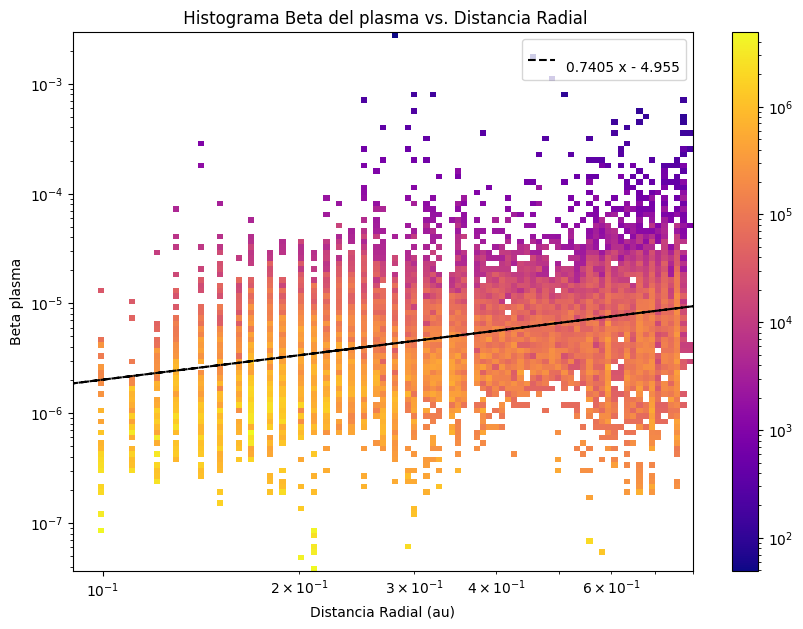

In [13]:
kB = 8.617333262e-5  # eV K**-1
mu_0 = 1.25663706212e-6 ## H/m
presion = Pdens*kB*Ptemp
presion_mag = 0.5*(B**2)/mu_0

beta = presion/presion_mag

# BETA DEL PLASMA
####################################################################################
####################################################################################
####################################################################################
####################################################################################
valid_indices = np.where(~np.isnan(R) & ~np.isnan(beta))
#Luego selecciono solo estos valores para el conteo de datos
valid_R = R[valid_indices]
valid_B = beta[valid_indices]

R_min, R_max = np.min(valid_R), np.max(valid_R)
B_min, B_max = np.min(valid_B), np.max(valid_B)

logx = np.log10(valid_R)
logy = np.log10(valid_B)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)

def yfit(x):
    return np.power(10, poly(np.log10(x)))

error_B = 0.5*(yfit(valid_R) - valid_B)/valid_B

# separo el espacio de datos en 100 "cajitas" de ancho y de alto
# utilizando escala logaritmica
R_bins = np.logspace(np.log10(R_min), np.log10(R_max), 100)
B_bins = np.logspace(np.log10(B_min), np.log10(B_max), 100)

plt.figure(figsize=(10,7))
plt.hist2d(valid_R, valid_B,  bins=(R_bins,B_bins), norm=colors.LogNorm(), density=True,cmap='plasma')
plt.plot(valid_R, yfit(valid_R), '--', c='black', label=str(poly))

plt.xlabel('Distancia Radial (au)')
plt.ylabel('Beta plasma')
plt.title(' Histograma Beta del plasma vs. Distancia Radial')
plt.colorbar()
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.show()